Sentiment Analysis

https://www.kaggle.com/datasets/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones/data
This project aims to use the reviews in the "Amazon_Unlocked_Mobile.csv" to predict the Ratings

In [1]:
import pandas as pd
import numpy as np
import nltk as nlp
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0


In [3]:
df['Rating'].shape[0] #413840 rows
df['Reviews'].shape[0] #413840 rows


413840

Assuming all rating = 3 are neutral, will be removed.


In [4]:
df = df[df['Rating'] != 3]
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413832,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,4,good rugged phone that has a long-lasting batt...,0.0
413834,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,1,used hard,0.0
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0


In [5]:
missing_values_Rating = df['Rating'].isnull().sum()
missing_values_Rating #0


0

In [6]:
missing_values_Reviews = df['Reviews'].isnull().sum()
missing_values_Reviews 

60

There are 70 missing values in the "Reviews" column and 0 in the Rating column, which is unbalanced - I will drop them out

In [7]:
df.dropna(inplace = True)
df['Reviews'].shape[0] #334328 rows
df['Rating'].shape[0] #334328 rows

308277

In [8]:
#Assuming all rating = 3 are neutral, will be removed.

df = df[df['Rating'] != 3]
df['Rating']

0         5
1         4
2         5
3         4
4         4
         ..
413832    4
413834    1
413835    5
413837    5
413839    4
Name: Rating, Length: 308277, dtype: int64

In [9]:
#Creating a new column serving as the target for the model
df['Positive Rating'] = np.where(df['Rating'] > 3, 1, 0)
df.head()

df['Positive Rating'].mean()

0.7482686025879323

Mean distribution for Positive Ratings

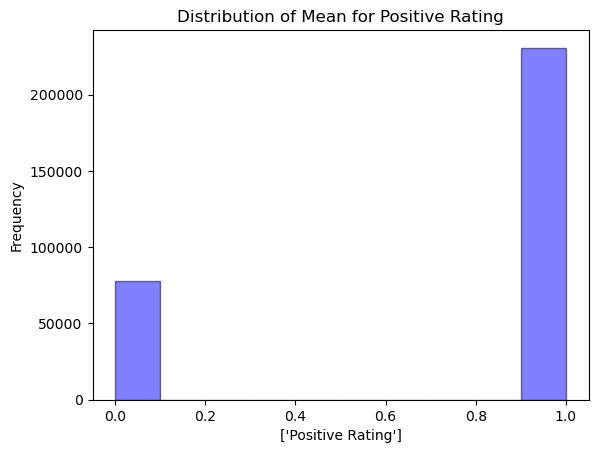

In [10]:
plt.hist(df['Positive Rating'], bins=10, color='blue', edgecolor='black', alpha=0.5)
plt.xlabel(['Positive Rating'])
plt.ylabel('Frequency')
plt.title('Distribution of Mean for Positive Rating')

plt.show()

Data split


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Positive Rating'], random_state = 0)

CountVectoriser

Converting words into a numeric representation 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer().fit(X_train)
vect

CountVectorizer()

In [13]:
vect.get_feature_names_out()[::2000] #Looking at every 2000th feature by getting the vocabulary of the tokens in occured in our training data.
#-> We see the data is messy, i.e. there are mispellings. 

array(['00', '4less', 'adr6275', 'assignment', 'blazingly', 'cassettes',
       'condishion', 'debi', 'dollarsshipping', 'esteem', 'flashy',
       'gorila', 'human', 'irullu', 'like', 'microsaudered',
       'nightmarish', 'p780w', 'pooring', 'quirkyness', 'responses',
       'sendable', 'sosh', 'synched', 'traceable', 'utilicen',
       'withstands'], dtype=object)

Looking at every 2000th feature by getting the vocabulary of the tokens in occured in our training data.
We can see the data is messy, i.e. there are mispellings. 

In [14]:
len(vect.get_feature_names_out()) 

53215

In [15]:
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<231207x53215 sparse matrix of type '<class 'numpy.int64'>'
	with 6117507 stored elements in Compressed Sparse Row format>

Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

c:\Users\Katha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The ROC AUC score


Sums up how well a model can produce relative scores to discriminate between positive or negative instances across all classification thresholds.

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

from sklearn.metrics import roc_auc_score

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions)) #AUC:  0.9202371012758845

c:\Users\Katha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC:  0.9199219144586525


In [18]:
feature_names = np.array(vect.get_feature_names_out())

In [19]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['worst' 'junk' 'garbage' 'unusable' 'false' 'useless' 'worthless'
 'disappointing' 'awful' 'waste']

Largest Coefs:
['excelent' 'excelente' 'exelente' 'loves' 'excellent' 'loving' 'perfecto'
 'love' 'complaints' 'perfect']



In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df = 5).fit(X_train)
len(vect.get_feature_names_out()) #18023

17950

In [21]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<231207x17950 sparse matrix of type '<class 'numpy.float64'>'
	with 6056427 stored elements in Compressed Sparse Row format>

In [22]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)


c:\Users\Katha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
from sklearn.metrics import roc_auc_score

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9267808687751367


In [24]:
feature_names = np.array(vect.get_feature_names_out())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest Coefs:\n{}\n'.format(feature_names[sorted_tfidf_index[:-11:-1]]))


Smallest Coefs:
['storageso' 'warmness' 'commenter' 'aggregration' 'pthalo' '1300'
 'bigtime' 'a10' 'abreast' 'liquidating']

Largest Coefs:
['handy' 'defected' 'nice' 'tiempo' 'damaged' 'dandy' 'negativo' 'days'
 'name' 'muy']



In [25]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working', 'an issue, phone is not working'])))

[0 0]


N-Grams

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data specifying a minimum document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

# Get the number of unique features
num_features = len(vect.get_feature_names_out())
num_features

198899

In [29]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

c:\Users\Katha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC:  0.9599596878716211


In [31]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
feature_names = np.array(vect.get_feature_names_out())

In [32]:
sorted_coef_index = model.coef_[0].argsort()

# Print the smallest and largest coefficients
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

# Predict new samples
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))


Smallest Coefs:
['no good' 'not happy' 'not worth' 'junk' 'not satisfied' 'garbage'
 'worst' 'not good' 'very bad' 'defective']

Largest Coefs: 
['excelent' 'excelente' 'not bad' 'exelente' 'excellent' 'perfect'
 'no problems' 'no issues' 'awesome' 'perfecto']
[1 0]
